
# <div align="center"> **Metodo di Monte Carlo** 
### <div align="center">  **Gruppo II**: Erica Brisigotti, Emmanuele Lotano, Ylenia Mascolo 
### <div align="center">  Laboratorio di Fisica III A - Modulo di Fisica Moderna <br> Anno accademico 2020/2021 - Università degli Studi dell'Insubria 
    

    
<br>
    
---
    
<br>

## **0. Introduzione**
Il metodo Monte Carlo è un'ampia classe di strategie computazionali basate sul campionamento casuale, usata per ottenere stime attraverso simulazioni. <br>
Questo algoritmo viene utilizzato per risolvere problemi matematici che sono caratterizzati da molte variabili e che non sono risolvibili facilmente. L'efficienza di questo metodo aumenta in proporzione alla crescita della dimensione del campione in esame. 

In particolare, di seguito questi algoritmi sono stati utilizzati per la risoluzione di quattro diversi problemi:
1. Stima di $\pi$
2. *Random walk*
3. Decadimento esponenziale
4. Problema di *Monty-Hall*

<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
from scipy.optimize import curve_fit

In [ ]:
fig=eval(input('Si desidera visualizzare le figure? Digitare True se sì, False se no: '))
if fig==True:
    print(' \n great! :) ')
else:
    print(' \n okay... sigh :( ')

<br>

---

<br>

## **1. Stima di $\pi$**
Questa analisi si è proposta di stimare il valore di $\pi$ a partire dall'analisi della porzione di piano data da:

$$ Q=[-1,1] \times [-1,1]$$

al cui interno è possibile inscrivere un cerchio $C$ di raggio $r_C=1$, centrato in $(0,0)$ e di equazione:

$$ x^2+y^2 \leq  1$$

Si ottiene infatti che il rapporto $R$ tra le superfici di tali luoghi geometrici risulta essere:

$$ R=\frac{A_C}{A_Q}=\frac{\pi \, r_C^2}{[1-(-1)]^2}=\frac{\pi}{4} $$

Pertanto, per stimare $\pi$, si è computato il valore $4R$ a partire dalla generazione di una grande quantità di punti distribuiti omogeneamente in $Q$. <br>

Infatti, statisticamente, studiando un campione costituito da un numero molto elevato di punti di questo tipo, si ottiene che la probabilità di ricadere all'interno di $C$ risulta essere prossima al rapporto $ R=\frac{\pi}{4} $ già menzionato.

L'ipotesi di poter generare dei punti omogeneamente distribuiti nella porzione di piano $Q$ è stata riprodotta tramite la generazione di una coppia di coordinate, ciascuna distribuita omogeneamente nell'intervallo [-1,1]. <br>


In [ ]:
N_max=eval(input('Inserire il numero massimo di iterazioni (N_max, consigliato 10000): '))
pos_in=np.empty(0,dtype=int)
pos_out=np.empty(0,dtype=int)
x=np.random.rand(N_max)*2-1
y=np.random.rand(N_max)*2-1
n=np.zeros((N_max))
    
for idx in range(N_max):
    if (x[idx]**2+y[idx]**2)<=1: 
        if fig==True:
            pos_in=np.append(pos_in,idx)
    else:
        if fig==True:
            pos_out=np.append(pos_out,idx)
    n[idx]=pos_in.size
prob=pos_in.size/N_max # probabilità totale (su N_max estrazioni)
sigma=np.abs(prob*4-np.pi)/np.pi*100 # sigma % sulla probabilità totale (su N_max estrazioni)

print('\nIl valore stimato per pigreco è pari a %.3f \n' % (prob*4))
print('ed è caratterizzato da incertezza percentuale pari a %.3f' % sigma ,'%.\n')
if fig==True:
    fig_pi=plt.figure(figsize=(8,8))
    ax_pi=fig_pi.gca()
    ax_pi.set_aspect(1)
    plt.plot(x[pos_in],y[pos_in],'X',color='crimson',markersize=10)
    plt.plot(x[pos_out],y[pos_out],'X',color='skyblue',markersize=10)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    circle=pat.Circle((0,0), radius=1,fill=False)
    ax_pi.add_artist(circle)
    plt.xlabel('x',fontsize=15)
    plt.ylabel('y',fontsize=15)
    plt.title('Punti generati per stimare $\pi$',fontsize=22)
    plt.grid('major')
    plt.show()  
    
del pos_in, pos_out, prob, sigma, x, y

I risultati appena riportati sono relativi all'intera simulazione. In particolare, la probabilità $R$ è stata calcolata come il rapporto tra i successi $n$ e i casi totali $N_{max}$:

$$ R=\frac{n}{N_{max}}$$

ed è stata corredata da una incertezza percentuale pari a:

$$ \sigma_\%=\frac{4 R-\pi}{\pi} 100\%$$ 

Di seguito sono rappresentati gli andamenti di queste quantità all'aumentare del numero di iterazioni effettuate $N$ (con $1 \leq N \leq N_{max}$):

In [ ]:
N=range(N_max+1)[1:] # iterazione N-esima (fino a N_max estrazioni)
p=np.divide(n,N) # probabilità calcolata all'N-esima iterazione 
s=np.divide(np.abs(p*4-np.pi),np.pi)*100 # errore percentuale relativo all'N-esima probabilità/iterazione

if fig==True:
    fig_pi=plt.figure(figsize=(18,6))
    plt.subplot(121)
    plt.plot(N,p*4,'-o',color='seagreen',label='valori stimati per $4R$')
    plt.hlines(np.pi,0,N_max+1,label='valore teorico di $\pi$')
    plt.xlim(0,N_max+1)
    plt.xlabel('numero di iterazioni $N$',fontsize=15)
    plt.ylabel('4R',fontsize=15)
    plt.title('Stima di $\pi \sim 4R$ tramite Monte Carlo',fontsize=22)
    plt.legend(fontsize=15)
    plt.grid('major')
    plt.subplot(122)
    plt.plot(N,s,'-o',color='lightgreen',label='valori stimati per $\sigma_\%$')
    plt.xlim(0,N_max+1)
    plt.xlabel('numero di iterazioni $N$',fontsize=15)
    plt.ylabel('errore percentuale $\sigma_\%$',fontsize=15)
    plt.title('Stima di $\sigma_\%$ di $\pi$ tramite Monte Carlo',fontsize=22)
    plt.legend(fontsize=15)
    plt.grid('major')
    
del N, p, s, N_max

<br>

---

<br>

## **2. Random walk** 
In un *Random walk* (altrimenti detto cammino aleatorio o passeggiata dell'ubriaco) monodimensionale si studia il moto di un oggetto vincolato a muoversi lungo una retta nelle due direzioni consentite, a partire da una posizione iniziale $x_0$: ad ogni iterazione, infatti, è possibile che l'oggetto avanzi o retroceda di un'unità con uguale probabilità $p=\frac{1}{2}$.

<div align="center"> <img src="drunkards-walk.png" style="width:350px" /> 

Dalla teoria è possibile dedurre che l'andamento della distanza percorsa dall'oggetto è simile a quello di una funzione della forma:

$$ f(N)=\sqrt{N}$$

che è stata infatti rappresentata accanto ai dati sperimentali.

Inserire il numero massimo di iterazioni (N_max, consigliato 1000):  100



L'oggetto si è fermato a distanza 4 unità dalla posizione di partenza x_0. 

Il punto più distante da esso occupato si trova a distanza 6 unità dalla posizione di partenza x_0. 



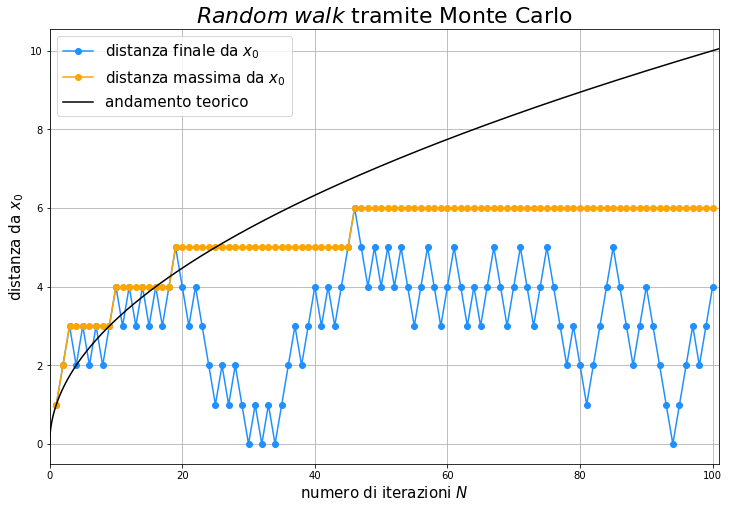

In [5]:
N_max=eval(input('Inserire il numero massimo di iterazioni (N_max, consigliato 1000): '))
N=range(N_max+1)[1:]
s=0
z=np.linspace(0,N_max+1,N_max**2)

bools=np.random.randint(2, size=N_max) # estrazione di quando sono fatti i passi in avanti
steps=bools+(bools-1) # calcolo delle mosse da fare
positions=np.cumsum(steps) # posizione assunta di conseguenza alle mosse
max_dist=np.maximum.accumulate(np.abs(positions)) # massima distanza delle varie posizioni occupate

print('\nL\'oggetto si è fermato a distanza %.f unità dalla posizione di partenza x_0. \n' % np.abs(positions[-1]))
print('Il punto più distante da esso occupato si trova a distanza %.f unità dalla posizione di partenza x_0. \n' % np.max(max_dist))
if fig==True:
    fig_pi=plt.figure(figsize=(12,8))
    plt.plot(N,np.abs(positions),'-o',color='dodgerblue',label='distanza finale da $x_0$')
    plt.plot(N,max_dist,'-o',color='orange',label='distanza massima da $x_0$')
    plt.plot(z,np.sqrt(z),'-k',label='andamento teorico')
    plt.xlim(0,N_max+1)
    plt.xlabel('numero di iterazioni $N$',fontsize=15)
    plt.ylabel('distanza da $x_0$',fontsize=15)
    plt.title('$Random \; walk$ tramite Monte Carlo',fontsize=22)
    plt.legend(fontsize=15)
    plt.grid('major')
    plt.show()
    
del N_max, N, s, z, bools, steps, positions, max_dist

<br>

---

<br>

## **3. Decadimento esponenziale**

Si dice che una quantità è soggetta a decadimento esponenziale se questa decresce con un tasso proporzionale al suo valore corrente. <br>
L'equazione differenziale che regola questo comportamento, infatti, ha forma:

$$ \frac{d N(t)}{dt}=- \lambda N(t) $$

e ha soluzione:

$$ N(t)=N_{max} \; e^{-\lambda \, t}=N_{max} \; e^{-\frac{t}{\tau}} $$

dove $N(t)$, in questo caso specifico, è il numero di particelle non ancora decadute in un sistema costituito inizialmente da $N_{max}$ particelle. <br>
Inoltre, $\lambda$ è detta **costante di decadimento** e rappresenta il tasso di decrescita esponenziale, mentre $\tau$ è la **vita media** di una particella all'interno del sistema e corrisponde al tempo necessario per ridurre il numero iniziale di particelle $N_{max}$ del $63.21 \%$.



Per quanti secondi vuoi osservare il decadimento? (consigliato 60) 60
Quante particelle vuoi utilizzare? (consigliato 100000) 10000
Che probabilità di decadimento si desidera utilizzare? (compresa tra 0 e 1)  0.3



 La costante di decadimento λ vale 0.358 Hz.

 Quindi la vita media τ=1/λ vale 2.793 s. 



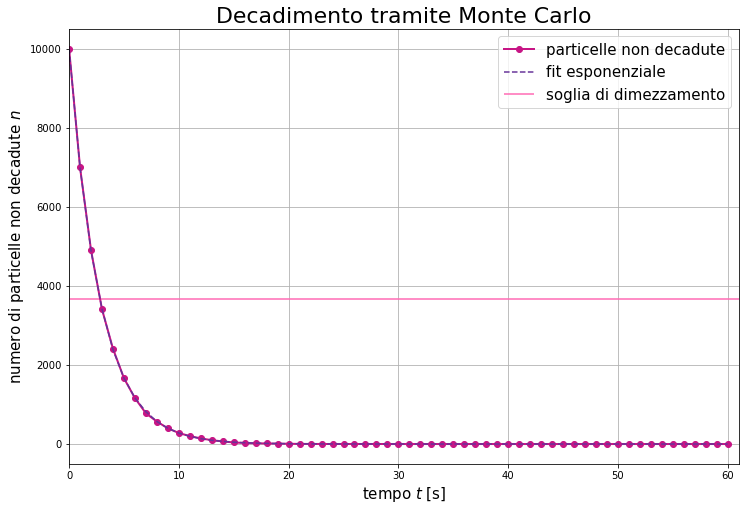

In [6]:
tempo=eval(input('Per quanti secondi vuoi osservare il decadimento? (consigliato 60)'))
N_max=np.int(input('Quante particelle vuoi utilizzare? (consigliato 100000)'))
prob=eval(input('Che probabilità di decadimento si desidera utilizzare? (compresa tra 0 e 1) '))
n=np.zeros((tempo+1),dtype=int)

def fun_fit(t, lam):
    return  N_max*np.exp(-lam*t)

n[0]=N_max
for idx in np.linspace(1,tempo,tempo,dtype=int):
    temp=np.random.choice(2,n[idx-1],p=[prob,(1-prob)])
    n[idx]=np.sum(temp)
pars= curve_fit(fun_fit,np.linspace(0,tempo,tempo+1),n) 
lam=pars[0][0]
tau=1/lam
    
print('\n La costante di decadimento λ vale %.3f Hz.' % lam)
print('\n Quindi la vita media τ=1/λ vale %.3f s. \n' % tau)
if fig==True:
    fig_dec=plt.figure(figsize=(12,8))
    plt.plot(np.linspace(0,tempo,tempo+1),n,'-o',color='mediumvioletred',label='particelle non decadute',lw=2)
    plt.xlim(0,tempo+1)
    plt.hlines(0.3679*N_max,0,tempo+1,color='hotpink',label='soglia di dimezzamento')
    plt.plot(np.linspace(0,tempo,tempo+1),fun_fit(np.linspace(0,tempo,tempo+1),pars[0]),'--',color='rebeccapurple',label='fit esponenziale')
    plt.xlabel('tempo $t$ [s]',fontsize=15)
    plt.ylabel('numero di particelle non decadute $n$',fontsize=15)
    plt.title('Decadimento tramite Monte Carlo',fontsize=22)
    plt.legend(fontsize=15)
    plt.grid('major')
    plt.show()
    
del tempo, N_max, prob, n, idx, temp, pars, tau, lam

<br>

---

<br>

## **4. Problema di _Monty-Hall_**

Il problema di *Monty Hall* è un famoso problema di teoria della probabilità, basato sul gioco a premi statunitense "*Let's Make a Deal*", il cui nome deriva infatti da uno pseudonimo del conduttore dello show, Maurice Halprin, noto come *Monty Hall*.

Nel gioco vengono mostrate al concorrente tre porte chiuse; dietro ad una si trova un'automobile, mentre le altre due nascondono una capra. Il giocatore deve scegliere una delle tre porte, per vincere il premio corrispondente. Dopo che il giocatore ha selezionato una porta, ma non l'ha ancora aperta, il conduttore dello show (che conosce ciò che si trova dietro ogni porta) apre una delle altre due, rivelando una delle due capre, e offre al giocatore la possibilità di cambiare la propria scelta iniziale, passando all'unica porta restante.  

<div align="center"> <img src="montyhall.jpg" style="width:325px" />       <img src="Paradosso_di_Monty_Hall.gif" style="width:450px" />

Dallo schema appena riportato, è facile notare che cambiare la porta migliora la probabilità $p$ del giocatore di vincere l'automobile, portandola da $p=\frac{1}{3}$ (senza cambiare) a $p=\frac{2}{3}$ (scegliendo l'altra). 

Di seguito, infatti, sono stati calcolati i successi e le probabilità ottenuti dall'applicazione di una strategia fissa, che può consistere nel:
- cambiare sempre porta quando viene offerta l'opportunità;
- non cambiare mai porta quando il conduttore propone tale opzione.

Quante partite desideri giocare? (consigliato 10000) 10000



La probabilità p di successo complessiva è stata di: 0.499 . 


La probabilità p di successo scegliendo come strategia di cambiare 
 sempre porta è stata di: 0.336 . 


La probabilità p di successo scegliendo come strategia di non cambiare 
 mai porta è stata di: 0.164 . 



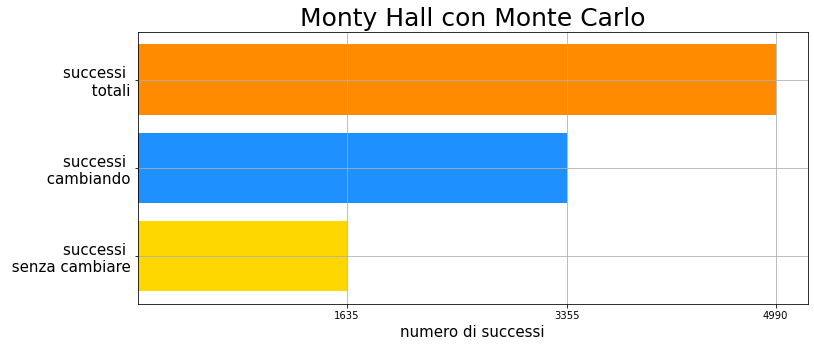

In [9]:
N_max=np.int(input('Quante partite desideri giocare? (consigliato 10000)'))
score=np.zeros(N_max,dtype=int)
yes=np.empty(0,dtype=int)
no=np.empty(0,dtype=int)

for idx in range(N_max):
    auto=np.random.randint(3) # scelta casuale di porta con auto
    choice1=np.random.randint(3) # scelta iniziale di concorrente
    temp=[0,1,2] 
    if choice1==auto:
        temp.remove(choice1)
        index=np.random.randint(0,2)
        opened=temp[index] # porta aperta dal conduttore
    else:
        temp.remove(choice1)
        temp.remove(auto)
        opened=temp[0] # porta aperta dal conduttore
    other=[0,1,2]
    other.remove(opened)
    other.remove(choice1)
    vect=[choice1,other[0]] # due scelte possibili rimanenti
    choice2=np.random.randint(0,2)
    var=np.int(vect[choice2]) # scelta finale del concorrente
    # salvataggio di punteggio di ciascuna gara
    if var==auto: 
        score[idx]=1
    else:
        score[idx]=0
    # salvataggio di posizioni in base al cambio di scelta
    if choice2==0: # rimane su choice1
        no=np.append(no,idx)
    else: # cambiato scelta
        yes=np.append(yes,idx)
p_tot=np.sum(score)/np.size(score)
p_yes=np.sum(score[yes])/np.size(score)
p_no=np.sum(score[no])/np.size(score)
        
print('\nLa probabilità p di successo complessiva è stata di: %.3f . \n' % p_tot)
print('\nLa probabilità p di successo scegliendo come strategia di cambiare \n sempre porta è stata di: %.3f . \n' % p_yes)
print('\nLa probabilità p di successo scegliendo come strategia di non cambiare \n mai porta è stata di: %.3f . \n' % p_no)

if fig==True:
    s_tot=np.sum(score)
    s_yes=np.sum(score[yes])
    s_no=np.sum(score[no])
    fig_hist=plt.figure(figsize=(12,5))
    ax_hist=fig_hist.gca()
    plt.grid('minor')
    ax_hist.barh(1, s_tot , align='center',color='darkorange')
    ax_hist.barh(2, s_yes , align='center',color='dodgerblue')
    ax_hist.barh(3, s_no , align='center',color='gold')
    plt.yticks([1,2,3],labels=('successi \n totali','successi \n cambiando','successi \n senza cambiare'),fontsize=15)
    plt.xticks([s_tot,s_yes,s_no])
    ax_hist.invert_yaxis()  # labels read top-to-bottom
    plt.xlabel('numero di successi',fontsize=15)
    plt.title('Monty Hall con Monte Carlo',fontsize=25)
    plt.show()
    del s_tot, s_yes, s_no
    
del N_max, score, yes, no, idx, auto, temp, choice1, choice2, opened, other, vect, var, p_tot, p_yes, p_no    